# Get Around project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# 1. Data analysis

In [2]:
xls = pd.ExcelFile('app/get_around_delay_analysis.xlsx')
dataset = pd.read_excel(xls, 'rentals_data')
dataset.head(10)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [71]:
print("Number of rows : {}".format(dataset.shape[0]))

print("Basics statistics: ")
display(dataset.describe(include='all'))

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])


Number of rows : 21310
Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [88]:
dataset.loc[dataset["rental_id"]==563782,:]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
17047,563782,370585,connect,ended,136.0,NaN,NaN


In [89]:
dataset['car_id'].nunique()

8143

In [70]:
print("Number of connect checkin type: ", dataset.loc[dataset["checkin_type"] == "connect",:].shape[0])
print("Number of mobile checkin type: ", dataset.loc[dataset["checkin_type"] != "connect",:].shape[0])

Number of connect checkin type:  4307
Number of mobile checkin type:  17003


In [90]:
print("Number of canceled booking: " + str(dataset.loc[dataset["state"] == "canceled",:].shape[0]))

Number of canceled booking: 3265


In [51]:
print("Maximum checkout delay (days): ", (dataset["delay_at_checkout_in_minutes"].max()/60)/24)
print("Checking type of the maximum checkout delay recorded: ", dataset.loc[dataset["delay_at_checkout_in_minutes"]==dataset["delay_at_checkout_in_minutes"].max(),"checkin_type"].values[0])

print("\nMinimum checkout delay (days): ", (dataset["delay_at_checkout_in_minutes"].min()/60)/24)
print("Checking type of the minimum checkout delay recorded: ", dataset.loc[dataset["delay_at_checkout_in_minutes"]==dataset["delay_at_checkout_in_minutes"].min(),"checkin_type"].values[0])

Maximum checkout delay (days):  49.36388888888889
Checking type of the maximum checkout delay recorded:  mobile

Minimum checkout delay (days):  -15.578472222222222
Checking type of the minimum checkout delay recorded:  mobile


In [3]:
counted = dataset[["state", "checkin_type"]].groupby(["state", "checkin_type"]).value_counts().reset_index()
counted = counted.rename(columns={"checkin_type":"type of checkin", 0:"Number of rentals"})
counted

,state,type of checkin,Number of rentals
0,canceled,connect,798
1,canceled,mobile,2467
2,ended,connect,3509
3,ended,mobile,14536


In [4]:
list(counted.iloc[1,:])

['canceled', 'mobile', 2467]

In [16]:
per_can_con = dataset.loc[(dataset["checkin_type"] == "connect") & (dataset["state"] == "canceled"),:].shape[0] / dataset.loc[dataset["checkin_type"] == "connect",:].shape[0]
per_can_mob = dataset.loc[(dataset["checkin_type"] == "mobile") & (dataset["state"] == "canceled"),:].shape[0] / dataset.loc[dataset["checkin_type"] == "mobile",:].shape[0]

print("Percentage of canceled rentals in connected contrats: ", round(per_can_con*100, 2), "%")
print("Percentage of canceled rentals in mobile contrats: ", round(per_can_mob*100, 2), "%")

Percentage of canceled rentals in connected contrats:  18.53 %
Percentage of canceled rentals in mobile contrats:  14.51 %


In [83]:
print("Values of checkout delay duration for canceled booking of connect contracts: ", dataset.loc[(dataset["checkin_type"] == "connect") & (dataset["state"] == "canceled"),"delay_at_checkout_in_minutes"].unique())
print("Values of time during rentals for canceled booking of connect contracts: ", dataset.loc[(dataset["checkin_type"] == "connect") & (dataset["state"] == "canceled"),"time_delta_with_previous_rental_in_minutes"].unique())

Values of checkout delay duraiton for canceled booking of connect contracts:  [nan]
Values of time during rentals for canceled booking of connect contracts:  [ nan 210. 630. 150. 330. 570.   0. 720. 420. 450. 600. 180.  60. 360.
 120. 300. 270. 540. 660. 690.  90. 510. 240.  30. 480.]


## 1.1 Quick viz

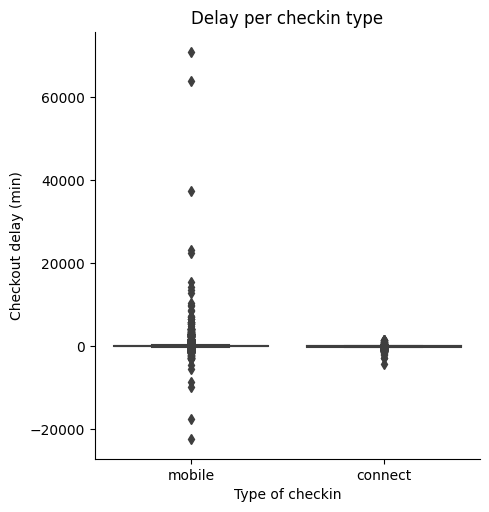

In [4]:
dc = sns.catplot(x="checkin_type", y="delay_at_checkout_in_minutes", data=dataset, kind="box")
dc.set(xlabel='Type of checkin',
       ylabel='Checkout delay (min)',
       title='Delay per checkin type')
plt.show()

- a lot of outliers with mobile, people lies of forgotten to checkout?

- focus in the connect contract, seems more reliable

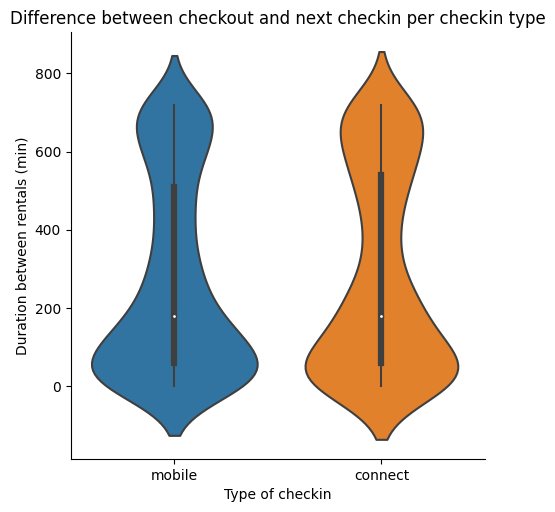

In [94]:
st = sns.catplot(x="checkin_type", y="time_delta_with_previous_rental_in_minutes", data=dataset, kind="violin")
st.set(xlabel='Type of checkin',
       ylabel='Duration between rentals (min)',
       title='Difference between checkout and next checkin per checkin type')
plt.show()

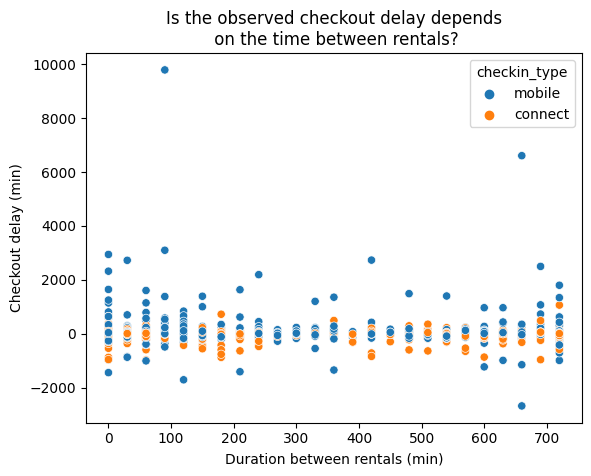

In [96]:
dc = sns.scatterplot(x="time_delta_with_previous_rental_in_minutes", y="delay_at_checkout_in_minutes", data=dataset, hue="checkin_type")
dc.set(ylabel='Checkout delay (min)',
       xlabel='Duration between rentals (min)',
       title='Is the observed checkout delay depends\n on the time between rentals?')
plt.show()

In [39]:
px.scatter(x="time_delta_with_previous_rental_in_minutes", y="delay_at_checkout_in_minutes", data_frame=dataset,
           title='Is the observed checkout delay depends <br> on the time between rentals?',
           labels={"time_delta_with_previous_rental_in_minutes":"Duration between rentals (min)",
                   "delay_at_checkout_in_minutes":"Checkout delay (min)",
                   "checkin_type":"Checking type"},
           range_y=(-2500, 10000),
           color="checkin_type", height=500, width=700)

Focus on connect contracts

In [112]:
connect = dataset.loc[dataset["checkin_type"] == "connect", :]
display(connect.head())
print("Average values per state\n", connect[["state", "delay_at_checkout_in_minutes", "time_delta_with_previous_rental_in_minutes"]].groupby("state").mean())
connect.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
9,513434,256528,connect,ended,23.0,NaN,NaN
11,514161,366037,connect,canceled,NaN,NaN,NaN


Average values per state
           delay_at_checkout_in_minutes  \
state                                    
canceled                           NaN   
ended                       -43.627278   

          time_delta_with_previous_rental_in_minutes  
state                                                 
canceled                                  300.000000  
ended                                     285.307918  


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,4307.000000,4307.000000,4307,4307,3402.000000,813.000000,813.000000
unique,NaN,NaN,1,2,NaN,NaN,NaN
top,NaN,NaN,connect,ended,NaN,NaN,NaN
freq,NaN,NaN,4307,3509,NaN,NaN,NaN
mean,551413.928024,340277.220107,NaN,NaN,-43.627278,551558.649446,287.675277
std,13505.680262,56346.003395,NaN,NaN,228.681964,12473.514438,258.950388
min,505091.000000,159533.000000,NaN,NaN,-4276.000000,505628.000000,0.000000
25%,542449.000000,310636.000000,NaN,NaN,-75.750000,543010.000000,60.000000
50%,552166.000000,355900.000000,NaN,NaN,-9.000000,552192.000000,180.000000
75%,561891.000000,383344.000000,NaN,NaN,32.000000,561530.000000,540.000000


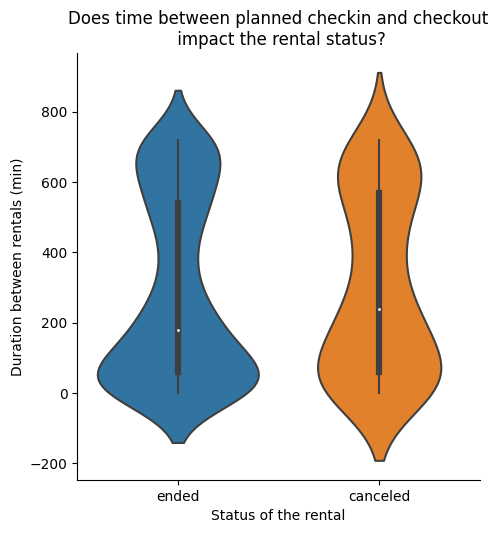

In [103]:
st = sns.catplot(x="state", y="time_delta_with_previous_rental_in_minutes", data=connect, kind="violin")
st.set(xlabel='Status of the rental',
       ylabel='Duration between rentals (min)',
       title='Does time between planned checkin and checkout\n impact the rental status?')
plt.show()

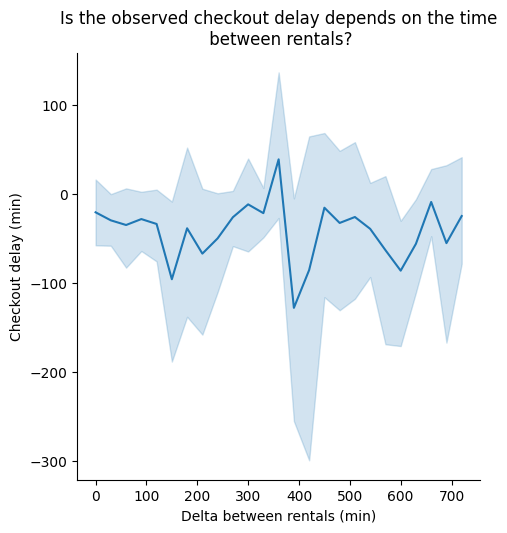

In [27]:
dc = sns.relplot(x="time_delta_with_previous_rental_in_minutes", y="delay_at_checkout_in_minutes", data=connect, kind="line")
dc.set(xlabel='Delta between rentals (min)',
       ylabel='Checkout delay (min)',
       title='Is the observed checkout delay depends on the time\n between rentals?')
plt.show()

- time between two rentals does not seem to impact the checkout delay

# 2. Machine Learning

In [5]:
import joblib
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

## 2.1 EDA

In [6]:
working = pd.read_csv("src/get_around_pricing_project.csv")
working.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [7]:
working = working.drop(axis=1, columns="Unnamed: 0")
working.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [16]:
print("Number of rows : {}".format(working.shape[0]))

print("Basics statistics: ")
display(working.describe(include='all'))

print("Percentage of missing values: ")
display(100*working.isnull().sum()/working.shape[0])

Number of rows : 4843
Basics statistics: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


Percentage of missing values: 


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

- no missing values
- numerical and categorical features

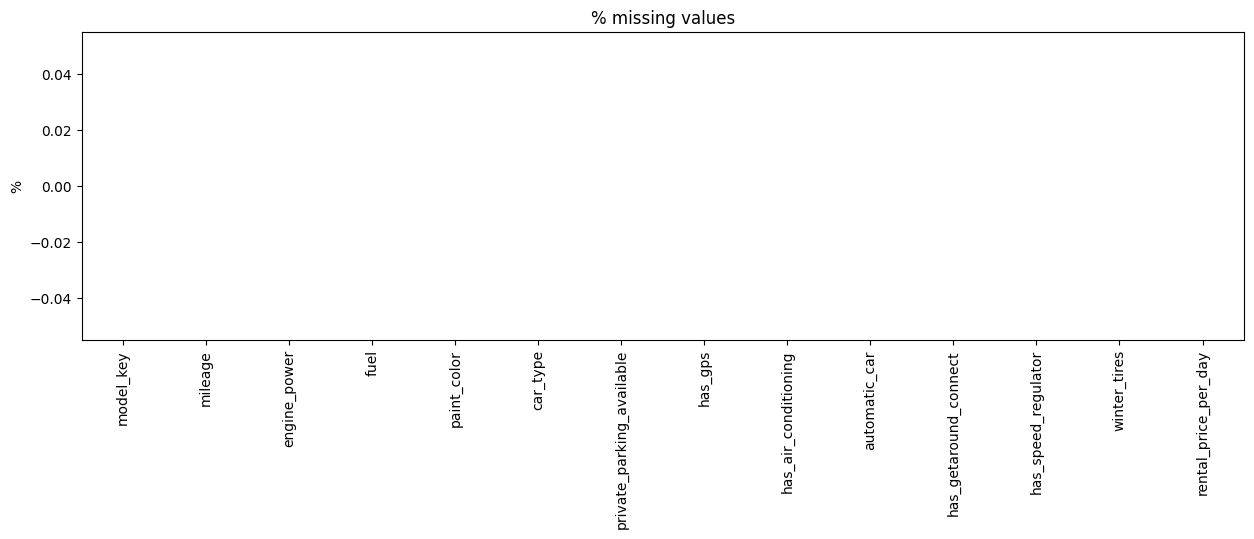

In [125]:
working.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), color= "darkseagreen",
    title="% missing values",
    ylabel="%")
plt.show()

In [36]:
working["model_key"].unique()

array(['Citroën', 'Peugeot', 'PGO', 'Renault', 'Audi', 'BMW', 'Ford',
       'Mercedes', 'Opel', 'Porsche', 'Volkswagen', 'KIA Motors',
       'Alfa Romeo', 'Ferrari', 'Fiat', 'Lamborghini', 'Maserati',
       'Lexus', 'Honda', 'Mazda', 'Mini', 'Mitsubishi', 'Nissan', 'SEAT',
       'Subaru', 'Suzuki', 'Toyota', 'Yamaha'], dtype=object)

In [22]:
# Visualize pairwise dependencies
fig = px.scatter_matrix(working)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
        autosize=False, height=1500, width =1500)
fig.show()

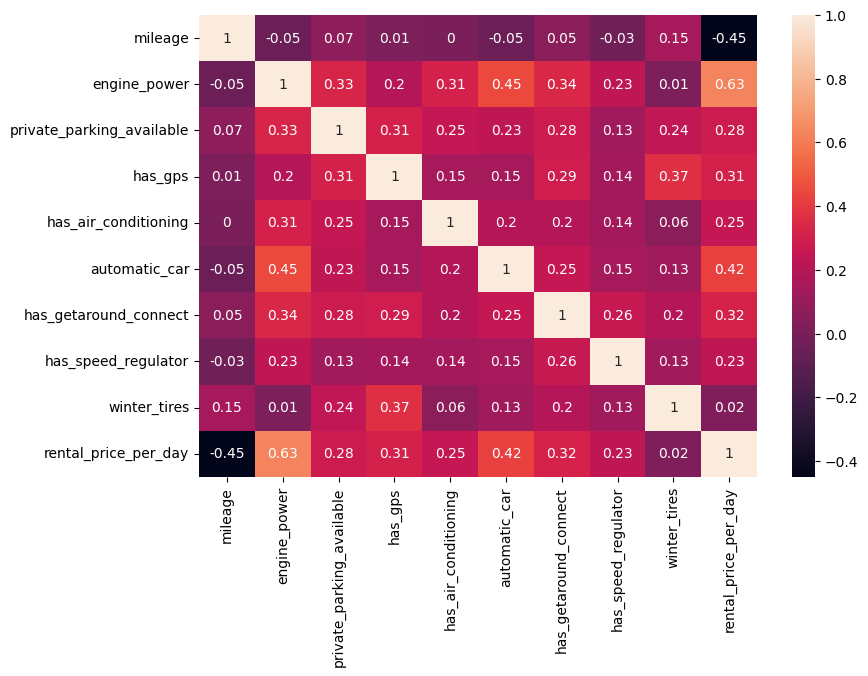

In [23]:
# Correlation matrix
corr_matrix = working.corr().round(2)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, ax=ax);

- engine_power is the most linked to rental_price_per_day
- mileage is negatively correlated to target

## 2.2 Models

### 2.2.1 Baseline

In [24]:
# spliting data
features_list = ["engine_power"]
target = "rental_price_per_day"

X = working.loc[:,features_list]
Y = working.loc[:,target]

print('Y : ')
print(Y.head(2))
print()
print('X :')
print(X.head(2))

Y : 
0    106
1    264
Name: rental_price_per_day, dtype: int64

X :
   engine_power
0           100
1           317


In [25]:
# dividing Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


In [26]:
# pipeline
print("Preprocessing X_train...")
print(X_train.head(2))
print()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print("...Done!")
print(X_train[0:2,:]) 

print("Preprocessing X_test...")
print(X_test.head(2))
print()
X_test = scaler.transform(X_test)
print("...Done!")
print(X_test[0:2,:])

Preprocessing X_train...
      engine_power
4550           135
1237           135

...Done!
[[0.16120867]
 [0.16120867]]
Preprocessing X_test...
      engine_power
1621            85
4098           135

...Done!
[[-1.12731653]
 [ 0.16120867]]


In [27]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

# Predictions on training set
Y_train_pred = regressor.predict(X_train)
# Predictions on test set
Y_test_pred = regressor.predict(X_test)

# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

Train model...
...Done.
R2 score on training set :  0.39364419802059814
R2 score on test set :  0.38168951706291354


In [28]:
print("10-fold cross-validation...")
scores = cross_val_score(regressor, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

10-fold cross-validation...
The cross-validated R2-score is :  0.3909386726048895
The standard deviation is :  0.05441616678150708


- non overfitting but low score

### 2.2.2 Preprocessing for the dataset

In [33]:
list(working.select_dtypes(include='object').columns)

['model_key', 'fuel', 'paint_color', 'car_type']

In [8]:
target = "rental_price_per_day"
features_list = ['model_key', 'mileage', 'engine_power', 'private_parking_available', 'has_gps', 'fuel', 'paint_color', 'car_type',
                'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
numeric_features = ['mileage', 'engine_power']
categorical_features = ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps',
                        'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

In [9]:
X = working.loc[:,features_list]
Y = working.loc[:,target]

print('Y : ')
print(Y.head(2))
print()
print('X :')
print(X.head(2))

Y : 
0    106
1    264
Name: rental_price_per_day, dtype: int64

X :
  model_key  mileage  engine_power  private_parking_available  has_gps  \
0   Citroën   140411           100                       True     True   
1   Citroën    13929           317                       True     True   

     fuel paint_color     car_type  has_air_conditioning  automatic_car  \
0  diesel       black  convertible                 False          False   
1  petrol        grey  convertible                 False          False   

   has_getaround_connect  has_speed_regulator  winter_tires  
0                   True                 True          True  
1                  False                 True          True  


In [10]:
# dividing Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print("...Done.")

# pipeline
## for numeric
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

## for categorical
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

## column transformer to apply all the transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# preprocessing training set
print("------ X_train before processing\n", X_train.head(2))
X_train = preprocessor.fit_transform(X_train).toarray()
print("------ X_train\n", X_train[0:2], "\n")

# preprocessing test set
print("------ X_test before processing\n", X_test.head(2)) 
X_test = preprocessor.transform(X_test).toarray()
print("------ X_test\n", X_test[0:2,:])

Dividing into train and test sets...
...Done.
------ X_train before processing
      model_key  mileage  engine_power  private_parking_available  has_gps  \
3309      Audi   146859           135                      False     True   
4462       BMW   152031           135                       True     True   

        fuel paint_color car_type  has_air_conditioning  automatic_car  \
3309  diesel       black    sedan                  True           True   
4462  diesel        blue      suv                  True           True   

      has_getaround_connect  has_speed_regulator  winter_tires  
3309                  False                False          True  
4462                   True                 True          True  
------ X_train
 [[0.10403635 0.15492122 1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0

### 2.2.3 Linear regression

In [109]:
# Train model
print("Train model...")
LRall = LinearRegression()
LRall.fit(X_train, Y_train)
print("...Done.")

# Predictions on training set
Y_train_pred_LRall = LRall.predict(X_train)
# Predictions on test set
Y_test_pred_LRall = LRall.predict(X_test)

# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred_LRall))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred_LRall))

Train model...
...Done.
R2 score on training set :  0.7115141086535233
R2 score on test set :  0.7085829718119055


In [110]:
## cross-val score
print("10-fold cross-validation...")
scoresR = cross_val_score(LRall, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scoresR.mean())
print('The standard deviation is : ', scoresR.std())

10-fold cross-validation...
The cross-validated R2-score is :  0.7004439417686049
The standard deviation is :  0.0562997889056376


- not so bad and without overfitting

#### Coefficients

In [111]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = LRall.coef_.transpose(), columns=["coefficients"])
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance[:5]

,coefficients
model_key_Lamborghini,0.109767
paint_color_black,0.382165
paint_color_grey,0.384201
paint_color_red,0.728756
private_parking_available_True,1.157953


In [112]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'v')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120}
                 )
fig.show(renderer="vscode")

### 2.2.4 Ridge model

In [113]:
# Perform grid search
print("Grid search...")
regressorR = Ridge()
# Grid of values to be tested
params = {'alpha': [0, 0.1, 0.5, 1, 1.5, 2]}
best_ridge = GridSearchCV(regressorR, param_grid = params, cv = 10)
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_ridge.best_params_)
print("Best R2 score : ", best_ridge.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 2}
Best R2 score :  0.7019895851511098


In [114]:
print("Ridge / R2 score on training set : ", best_ridge.score(X_train, Y_train))
print("Ridge / R2 score on test set : ", best_ridge.score(X_test, Y_test))

Ridge / R2 score on training set :  0.7098709417999087
Ridge / R2 score on test set :  0.7067333934916937


In [115]:
## cross-val score
print("10-fold cross-validation...")
scoresRidge = cross_val_score(best_ridge, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scoresRidge.mean())
print('The standard deviation is : ', scoresRidge.std())

10-fold cross-validation...
The cross-validated R2-score is :  0.7018330497224048
The standard deviation is :  0.05374206841738235


- slightly better than linear regression

### 2.2.5 Lasso model

In [116]:
# Perform grid search
print("Grid search...")
regressorL = Lasso()
# Grid of values to be tested
params = {'alpha': [0.0025, 0.003, 0.0032, 0.0035, 0.0037, 0.004]}
best_lasso = GridSearchCV(regressorL, param_grid = params, cv = 10)
best_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_lasso.best_params_)
print("Best R2 score : ", best_lasso.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0035}
Best R2 score :  0.7005725459807886


In [117]:
print("Lasso / R2 score on training set : ", best_lasso.score(X_train, Y_train))
print("Lasso / R2 score on test set : ", best_lasso.score(X_test, Y_test))

Lasso / R2 score on training set :  0.711107215746094
Lasso / R2 score on test set :  0.7076600604641919


In [119]:
## cross-val score
print("10-fold cross-validation...")
scoresLasso = cross_val_score(best_lasso, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scoresLasso.mean())
print('The standard deviation is : ', scoresLasso.std())

10-fold cross-validation...
The cross-validated R2-score is :  0.700472539743448
The standard deviation is :  0.05511899950125252


- not better than Ridge model

### 2.2.6 Running best model on total dataset, coefficient of the best model and export

In [11]:
X_all = X.copy()
Y_all = Y.copy()

# pipeline
## for numeric
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

## for categorical
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

## column transformer to apply all the transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# preprocessing training set
print("------ X_all before processing\n", X_all.head(2))
X_all = preprocessor.fit_transform(X_all).toarray()
print("------ X_train\n", X_all[0:2], "\n")

# Perform grid search
best_model = Ridge(alpha=2)
best_model.fit(X_all, Y_all)
print("...Done.")

print("\n------\nRidge / R2 score on dataset : ", best_model.score(X_all, Y_all))

------ X_all before processing
   model_key  mileage  engine_power  private_parking_available  has_gps  \
0   Citroën   140411           100                       True     True   
1   Citroën    13929           317                       True     True   

     fuel paint_color     car_type  has_air_conditioning  automatic_car  \
0  diesel       black  convertible                 False          False   
1  petrol        grey  convertible                 False          False   

   has_getaround_connect  has_speed_regulator  winter_tires  
0                   True                 True          True  
1                  False                 True          True  
------ X_train
 [[-0.00916755 -0.7434913   0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.

In [122]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = best_model.coef_.transpose(), columns=["coefficients"])
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance[:5]

,coefficients
paint_color_grey,0.062105
has_air_conditioning_True,0.811811
paint_color_black,1.127171
model_key_Lexus,1.349705
private_parking_available_True,1.422337


In [123]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'v')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120}
                 )
fig.show(renderer="vscode")

- Export of Ridge model

In [12]:
with open("src/model_bestRidge.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [13]:
with open("src/preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)